In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def normalize_per_state(df, start, end):
    scaler = StandardScaler()
    df.iloc[start:end, :] = scaler.fit_transform(df.iloc[start:end, :])
    return df

raw = 0 #rawデータならば１、Bandなら０

# 1秒ごとのデータに分割
n_samples_per_second = 256  # 256Hzのサンプリングレート
total_seconds = 10  # 全体の秒数

# データの読み込み
if(raw):
    df = pd.read_csv('Raw.csv')
else:
    df = pd.read_csv('Band.csv')
    
# チャンネルごとに正規化
scaler = StandardScaler()
for column in df.columns[:-1]:  # 'State'列を除くすべての列
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

In [2]:
def plot_importance(raw, clf):
    if(raw):
        #14chデータ

        # 特徴量（チャンネル）の名前
        channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

        # 特徴量の重要度
        feature_importance = np.abs(clf.coef_[0])

        # 名前と重要度をデータフレームにまとめる
        importance_df = pd.DataFrame({
            'Channel': channel_names,
            'Importance': feature_importance
        })

        # 降順にソート
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # 棒グラフの表示
        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Channel'], importance_df['Importance'], color='skyblue')
        plt.xlabel("Feature Importance")
        plt.title("Feature importance of each EEG channel")
        plt.gca().invert_yaxis()  # 上位の特徴量を上に表示
        plt.show()
    else:
        #bandデータ
        # 特徴量（チャンネル）の名前
        channel = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
        band_filter = ["Delta", "Theta", "Alpha", "Beta"]

        channel_names = []
        ch_len = 14
        for i in range(ch_len):
            for j in range(len(band_filter)):
                channel_names.append(channel[i] + band_filter[j])

        # 特徴量の重要度
        feature_importance = np.abs(clf.coef_[0])

        # 名前と重要度をデータフレームにまとめる
        importance_df = pd.DataFrame({
            'Channel': channel_names,
            'Importance': feature_importance
        })

        # 特徴重要度の高いトップ5の特徨量を取得
        top5_features = importance_df.sort_values(by='Importance', ascending=False).head(5)

        # 棒グラフの表示
        plt.figure(figsize=(8, 4))
        plt.barh(top5_features['Channel'], top5_features['Importance'], color='skyblue')
        plt.xlabel("Feature Importance")
        plt.title("Top 5 Feature importance of each EEG channel")
        plt.gca().invert_yaxis()  # 上位の特徴量を上に表示
        plt.show()
    return plt.show

Training Accuracy: 87.50%
Test Accuracy: 50.00%


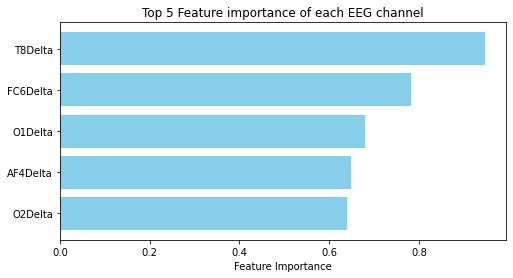

<function matplotlib.pyplot.show(close=None, block=None)>

In [3]:
#時間ごと（１秒毎）
# ラベルの作成（5秒閉じ、5秒開け）
labels_close = [0] * 5 
labels_open = [1] * 5 
labels = labels_close + labels_open

#14chデータ
# データとラベルを1秒ごとに分割
X = np.array([df.iloc[i*n_samples_per_second:(i+1)*n_samples_per_second, :-1].values for i in range(total_seconds)])

# 1秒ごとのデータの平均を取得
X = X.mean(axis=1)

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

# SVMモデル作成
clf1 = svm.SVC(kernel='linear')  # 線形カーネルを使用
clf1.fit(X_train, y_train)

# 訓練データに対する評価
train_score = clf1.score(X_train, y_train)
print(f"Training Accuracy: {train_score*100:.2f}%")

# テストデータに対する評価
test_score = clf1.score(X_test, y_test)
print(f"Test Accuracy: {test_score*100:.2f}%")

#plot
plot_importance(raw, clf1)

Training Accuracy: 81.49%
Test Accuracy: 79.30%


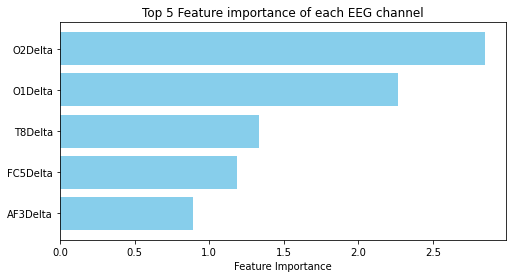

<function matplotlib.pyplot.show(close=None, block=None)>

In [4]:
# Hzごと
# 特徴量と目標変数を抽出する
X = df.drop('State', axis=1)  # 'State'以外の列すべてを特徴量とします
y = df['State']  # 'State'を目標変数とします

# データを訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # テストデータを全体の20%に設定

# SVMモデルを訓練する
clf2 = svm.SVC(kernel='linear')  
clf2.fit(X_train, y_train)  # モデルを訓練データで訓練する

# 訓練データに対する評価
train_score = clf2.score(X_train, y_train)
print(f"Training Accuracy: {train_score*100:.2f}%")

# テストデータに対する評価
test_score = clf2.score(X_test, y_test)
print(f"Test Accuracy: {test_score*100:.2f}%")

#plot
plot_importance(raw, clf2)

In [5]:
len(clf1.coef_[0])

56